<a href="https://colab.research.google.com/github/byrongomezjr/AAPLStockForecastingWithLSTM/blob/main/AAPLStockForecastingWithLSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset

In [200]:
#load dataset
from google.colab import files
dataset = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [331]:
df = pd.read_csv('AAPL.csv')

In [332]:
df.shape

(2393, 7)

In [333]:
df = df['Open'].values
df = df.reshape(-1,1)

In [334]:
df.shape

(2393, 1)

In [335]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

print(dataset_train.shape)
print(dataset_test.shape)

(1914, 1)
(479, 1)


#importing the module

In [336]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

#scaling data

In [337]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
dataset_train[:5]

array([[0.04706981],
       [0.04585156],
       [0.0459415 ],
       [0.06216872],
       [0.05994212]])

In [338]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[-0.13490744],
       [-0.13479425],
       [-0.1344858 ],
       [-0.13455245],
       [-0.13462185]])

# creating our datasets

In [339]:
def create_dataset(df):
  x = []
  y = []
  for i in range(50, df.shape[0]):
    x.append(df[i-50:i, 0])
    y.append(df[i, 0])
  x = np.array(x)
  y = np.array(y)
  return x,y

# training and testing data

In [340]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

# reshaping our data, turning it into a 3D array

In [341]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#model building

In [342]:
model = Sequential()
model.add(LSTM(units=16, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [343]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [344]:
model.compile(loss='mean_squared_error', optimizer='adam')

# start training

In [215]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('AAPL_stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 14s 114ms/step - loss: 0.0084
Epoch 2/50
59/59 [==============================] - 7s 112ms/step - loss: 0.0020
Epoch 3/50
59/59 [==============================] - 7s 110ms/step - loss: 0.0020
Epoch 4/50
59/59 [==============================] - 7s 111ms/step - loss: 0.0015
Epoch 5/50
59/59 [==============================] - 7s 113ms/step - loss: 0.0015
Epoch 6/50
59/59 [==============================] - 7s 112ms/step - loss: 0.0015
Epoch 7/50
59/59 [==============================] - 7s 126ms/step - loss: 0.0014
Epoch 8/50
59/59 [==============================] - 7s 111ms/step - loss: 0.0015
Epoch 9/50
59/59 [==============================] - 7s 113ms/step - loss: 0.0013
Epoch 10/50
59/59 [==============================] - 7s 112ms/step - loss: 0.0011
Epoch 11/50
59/59 [==============================] - 7s 111ms/step - loss: 0.0013
Epoch 12/50
59/59 [==============================] - 7s 120ms/step - loss: 0.0012
Epoch 13/50
59/59 [=====

#loading our model

In [345]:
model = load_model('AAPL_stock_prediction.h5')

#data visualization

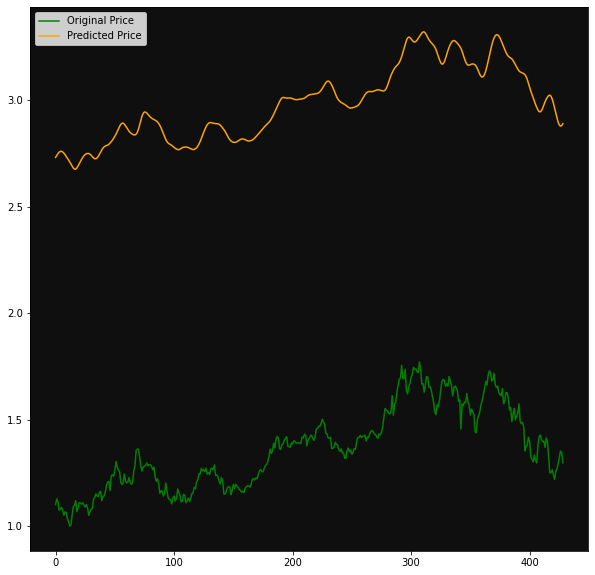

In [346]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor('#0f0f0f')
ax.plot(y_test_scaled, color='green', label='Original Price')
plt.plot(predictions, color='orange', label='Predicted Price')
plt.legend()